# Iris Data Analysis & Predictive Model


Iris Plants Database
====================

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
    :Class Distribution: 33.3% for each of 3 classes.
    :Creator: R.A. Fisher
    :Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
    :Date: July, 1988

This is a copy of UCI ML iris datasets.
http://archive.ics.uci.edu/ml/datasets/Iris

The famous Iris database, first used by Sir R.A Fisher

This is perhaps the best known database to be found in the
pattern recognition literature.  Fisher's paper is a classic in the field and
is referenced frequently to this day.  (See Duda & Hart, for example.)  The
data set contains 3 classes of 50 instances each, where each class refers to a
type of iris plant.  One class is linearly separable from the other 2; the
latter are NOT linearly separable from each other.

References
----------
   - Fisher,R.A. "The use of multiple measurements in taxonomic problems"
     Annual Eugenics, 7, Part II, 179-188 (1936); also in "Contributions to
     Mathematical Statistics" (John Wiley, NY, 1950).
   - Duda,R.O., & Hart,P.E. (1973) Pattern Classification and Scene Analysis.
     (Q327.D83) John Wiley & Sons.  ISBN 0-471-22361-1.  See page 218.
   - Dasarathy, B.V. (1980) "Nosing Around the Neighborhood: A New System
     Structure and Classification Rule for Recognition in Partially Exposed
     Environments".  IEEE Transactions on Pattern Analysis and Machine
     Intelligence, Vol. PAMI-2, No. 1, 67-71.
   - Gates, G.W. (1972) "The Reduced Nearest Neighbor Rule".  IEEE Transactions
     on Information Theory, May 1972, 431-433.
   - See also: 1988 MLC Proceedings, 54-64.  Cheeseman et al"s AUTOCLASS II
     conceptual clustering system finds 3 classes in the data.
   - Many, many more ...

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
import seaborn as sns

In [2]:
iris= datasets.load_iris()

In [3]:
# print(iris.keys())

iris_data = iris['data']
iris_target = iris['target']
iris_target_names = iris['target_names']
iris_descr = iris['DESCR']
iris_feature_names = iris['feature_names']

print(" Target map ",iris_target_names)
print("\n\n ")

iris_feat_df = pd.DataFrame(data=iris_data, columns=iris_feature_names)
iris_target_df = pd.DataFrame(data=iris_target, columns=['Targets'])
iris_dataset= pd.concat([iris_feat_df, iris_target_df], axis=1)
print(iris_dataset.head(10))

 Target map  ['setosa' 'versicolor' 'virginica']


 
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   
5                5.4               3.9                1.7               0.4   
6                4.6               3.4                1.4               0.3   
7                5.0               3.4                1.5               0.2   
8                4.4               2.9                1.4               0.2   
9                4.9               3.1                1.5               0.1   

   Targets  
0        0  
1        0  
2        0  
3        0  
4        0  

*************Statistics****************

SEPAL LENGTH (CM) has mean 5.843333333333334 and Standard Deviation 0.8253012917851409 

SEPAL WIDTH (CM) has mean 3.0540000000000003 and Standard Deviation 0.4321465800705435 

PETAL LENGTH (CM) has mean 3.758666666666666 and Standard Deviation 1.7585291834055212 

PETAL WIDTH (CM) has mean 1.1986666666666668 and Standard Deviation 0.7606126185881716 

**********************************************


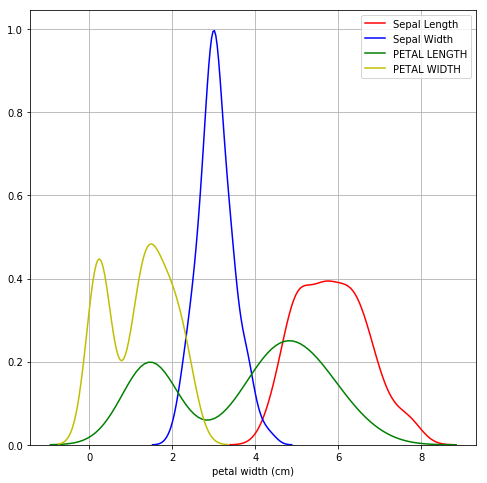

In [4]:
print("*************Statistics****************\n")

for i in iris_feat_df.columns:
    print("{} has mean {} and Standard Deviation {} \n".format(i.upper(),
                                                              np.mean(iris_feat_df[i]),
                                                             np.sqrt(np.var(iris_feat_df[i]))))
print("**********************************************")

plt.figure(figsize=(8,8))
plt.grid()

sns.distplot(iris_feat_df['sepal length (cm)'],  color="r", label="Sepal Length", hist=False, )
sns.distplot(iris_feat_df['sepal width (cm)'],  color= 'b', label="Sepal Width",hist=False)
sns.distplot(iris_feat_df['petal length (cm)'],  color= 'g', label = 'PETAL LENGTH', hist=False)
sns.distplot(iris_feat_df['petal width (cm)'],  color= 'y', label = 'PETAL WIDTH' , hist=False)
plt.legend()
plt.show()


## Correlation check

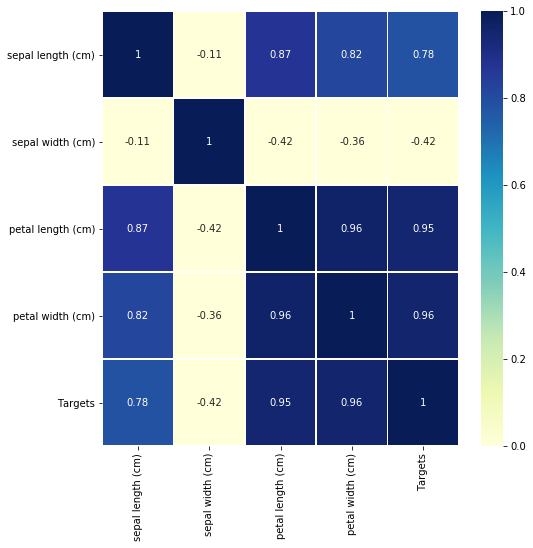

In [5]:

iris_dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(iris_dataset.corr(), annot=True, vmin=0, vmax=1, linewidths=0.5, cmap="YlGnBu")
plt.show()

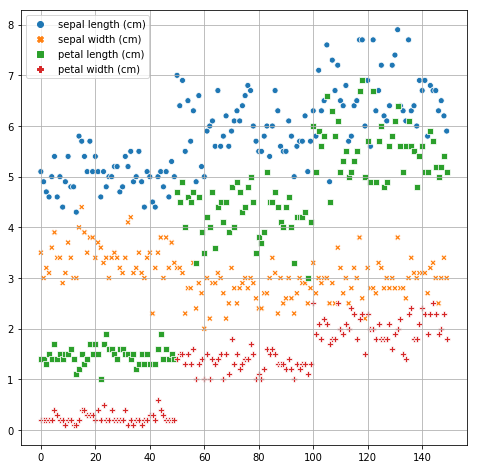

In [6]:
# vif, r2
plt.figure(figsize=(8,8))
plt.grid()
sns.scatterplot(data=iris_feat_df )
plt.show()

# Building a Model


In [7]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

iris_dataset = sklearn.utils.shuffle(iris_dataset)

X = iris_dataset.drop("Targets", axis= 1).values
y = iris_dataset["Targets"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101 )




## 1. Stochastic Gradient Descent (SGD)

In [8]:
sgd = SGDClassifier(loss="hinge", penalty="l2", max_iter=5)
sgd.fit(X_train, y_train)

pred = sgd.predict(X_test)
print("Accuracy of the SGD Classifier", sgd.score(X_test, y_test))

accuracy_dict = {'SGD Classifier':round(sgd.score(X_test, y_test), 2)*100}

Accuracy of the SGD Classifier 0.6333333333333333



## 2. SVC



In [9]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
svc.score(X_test, y_test)
print("Accuracy of the SVC Classifier", svc.score(X_test, y_test))

accuracy_dict['SVC Classifier'] = round(svc.score(X_test, y_test), 2)*100


Accuracy of the SVC Classifier 0.9666666666666667


## 3. K Nearest neighbours

In [10]:
from sklearn.neighbors import KNeighborsClassifier

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)
print("Accuracy of the K-Nearest Classifier", knc.score(X_test, y_test))

accuracy_dict['K-Nearest Classifier'] = round(knc.score(X_test, y_test), 2)*100

Accuracy of the K-Nearest Classifier 0.9666666666666667


## 4. Random Forest Classifier

In [11]:
from sklearn.ensemble import RandomForestClassifier

rd = RandomForestClassifier(n_estimators=10)
rd.fit(X_train, y_train)

print("Accuracy of the Random Forest Classifier", rd.score(X_test, y_test))

accuracy_dict['Random Forest Classifier'] = round(rd.score(X_test, y_test), 2)*100

Accuracy of the Random Forest Classifier 0.9333333333333333


c:\users\nsingh1\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Comparing Accuracy

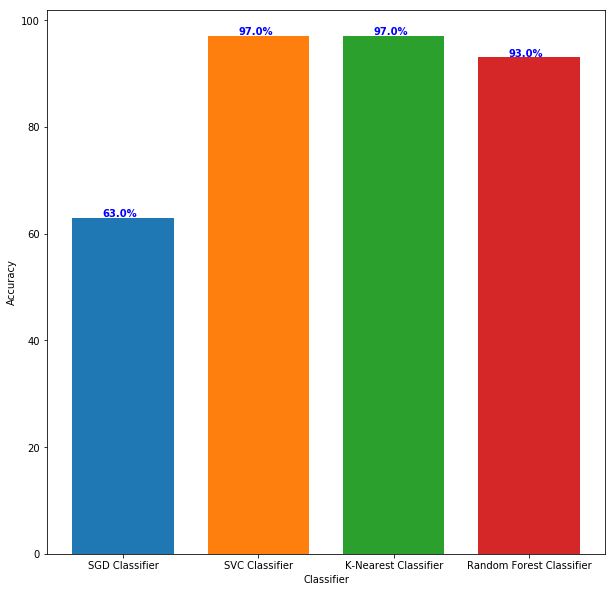

In [12]:
#tick_label does the some work as plt.xticks()

fig, ax = plt.subplots() 
fig.set_size_inches(10,10)
values= list (accuracy_dict.values())
names = list( accuracy_dict.keys())

for i in range(len(values)):
    ax.bar(i, values[i],tick_label=names[i], width = .75 )
    ax.text(i - 0.15 , values[i]  + .25, str(values[i])+"%", color='blue', fontweight='bold')
               
plt.xlabel("Classifier")
plt.ylabel("Accuracy")
plt.xticks(range(0,4),names)

plt.show()